In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Describe the first few rows of dataset.
df=pd.read_csv("IPL Dataset.csv")
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,run,over
0,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,0,1,0.0,0.0,0.0,1.0,,,1,0
1,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
2,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,1,1.0,0.0,0.0,0.0,,,1,0
3,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
4,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0


In [30]:
# Describe the summary of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          194354 non-null  int64  
 1   season            194354 non-null  int64  
 2   start_date        194354 non-null  object 
 3   venue             194354 non-null  object 
 4   innings           194354 non-null  int64  
 5   ball              194354 non-null  float64
 6   batting_team      194354 non-null  object 
 7   bowling_team      194354 non-null  object 
 8   striker           194354 non-null  object 
 9   non_striker       194354 non-null  object 
 10  bowler            194354 non-null  object 
 11  runs_off_bat      194354 non-null  int64  
 12  extras            194354 non-null  int64  
 13  wides             194354 non-null  float64
 14  noballs           194354 non-null  float64
 15  byes              194354 non-null  float64
 16  legbyes           19

In [31]:
# Describe all season.
df['season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019,
       2018, 2020, 2021], dtype=int64)

In [32]:
# Describe all venue.
df['venue'].unique()

array(['M.Chinnaswamy Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Arun Jaitley Stadium', 'Eden Gardens', 'Wankhede Stadium, Mumbai',
       'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk, Chennai',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cric

In [33]:
# Describe all batting team.
df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Gujarat Lions', 'Delhi Capitals'],
      dtype=object)

In [34]:
# Describe all runs off bat.
df['runs_off_bat'].unique()

array([0, 4, 6, 1, 2, 5, 3], dtype=int64)

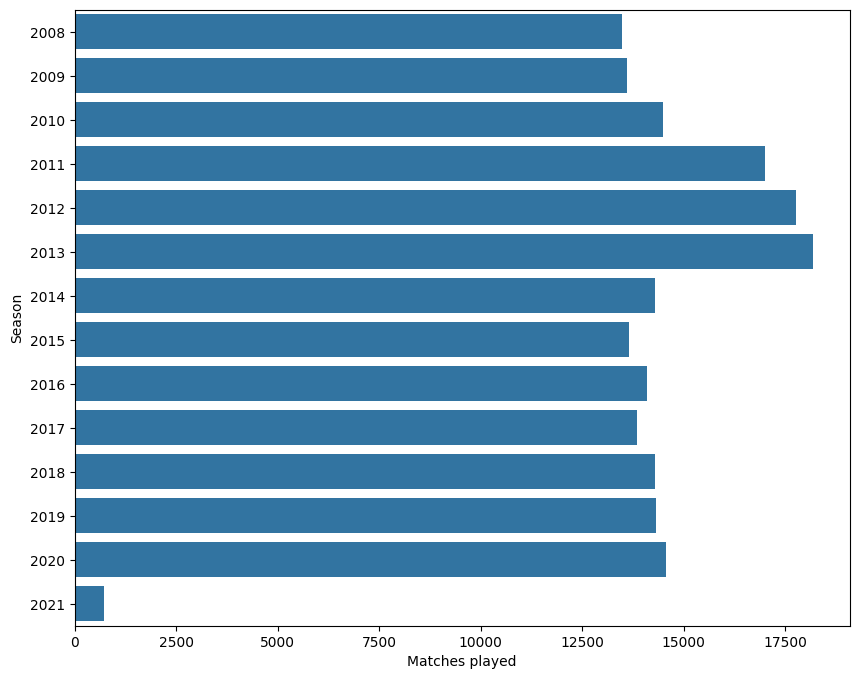

In [35]:
# Describe how many matches are played in each sesaon.
data=df.groupby('season')['match_id'].count()

plt.figure(figsize=(10,8))
sns.barplot(y=data.index,x=data.values,orient='h')

plt.xlabel('Matches played')
plt.ylabel('Season')

plt.show()

In [36]:
# which venue has highest matches.
# which player scored most sixes.
# which player scored most fours.
matches_per_venue_syntax=df[['match_id','venue']].drop_duplicates().groupby('venue').size().idxmax()
highest_sixes=df[df['runs_off_bat']==6].groupby('striker').size().idxmax()
highest_fours=df[df['runs_off_bat']==4].groupby('striker').size().idxmax()

matches_per_venue_syntax,highest_sixes,highest_fours

('M.Chinnaswamy Stadium', 'CH Gayle', 'S Dhawan')

In [37]:
#which player has most 50s
#which player has most 100s
batting_data=df.groupby(["match_id","striker"])["runs_off_bat"].sum().reset_index()

highest_fifties= batting_data[(batting_data["runs_off_bat"] >= 50) &  (batting_data["runs_off_bat"] < 100)] \
    .groupby("striker").size().idxmax()
highest_hundred = batting_data[batting_data["runs_off_bat"] >= 100]\
    .groupby("striker").size().idxmax()

print(f"Player with most 50s: {highest_fifties}")
print(f"Player with most 100s: {highest_hundred}")

Player with most 50s: DA Warner
Player with most 100s: CH Gayle


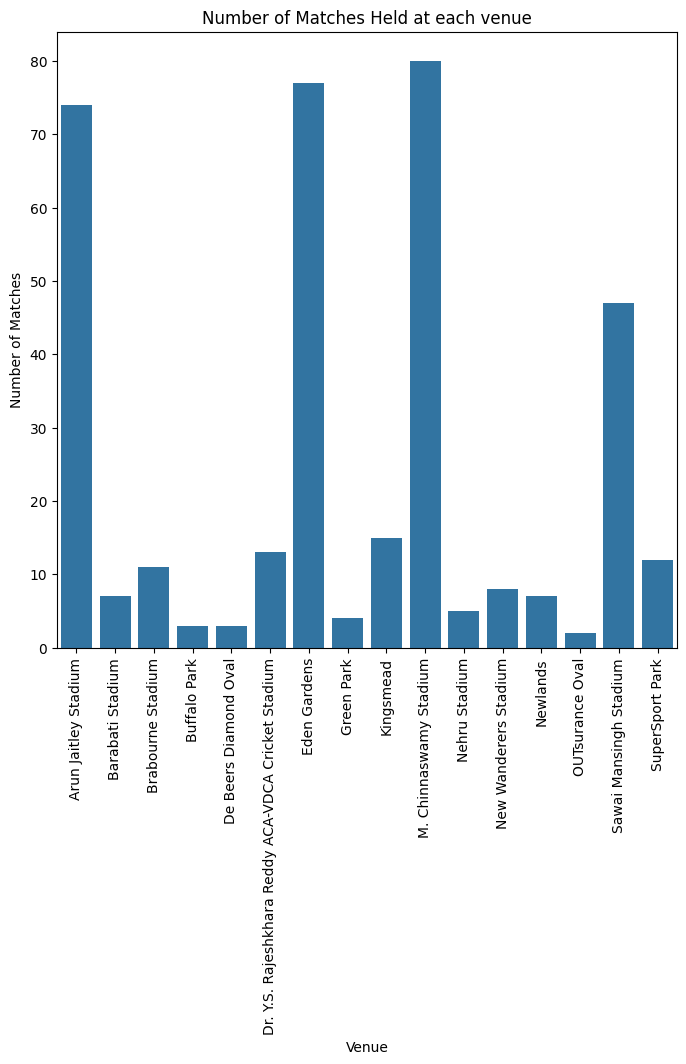

In [38]:
# display how many matches played at each venue.
venue_data={
    'Arun Jaitley Stadium':74,
    'Barabati Stadium':7,
    'Brabourne Stadium':11,
    'Buffalo Park':3,
    'De Beers Diamond Oval':3,
    'Dr. Y.S. Rajeshkhara Reddy ACA-VDCA Cricket Stadium':13,
    'Eden Gardens':77,
    'Green Park':4,
    'Kingsmead':15,
    'M. Chinnaswamy Stadium':80,
    'Nehru Stadium':5,
    'New Wanderers Stadium':8,
    'Newlands':7,
    'OUTsurance Oval':2,
    'Sawai Mansingh Stadium':47,
    'SuperSport Park':12
}

df_venue=pd.Series(venue_data)

highest_sixes_player='CH Gayle'

plt.figure(figsize=(8,8))
sns.barplot(x=df_venue.index,y=df_venue.values)
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Held at each venue')
plt.xticks(rotation=90) #rotate x-axis labels for better visibility
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_12696\2967663373.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=player_sixes.index,y=player_sixes.values,palette='viridis')


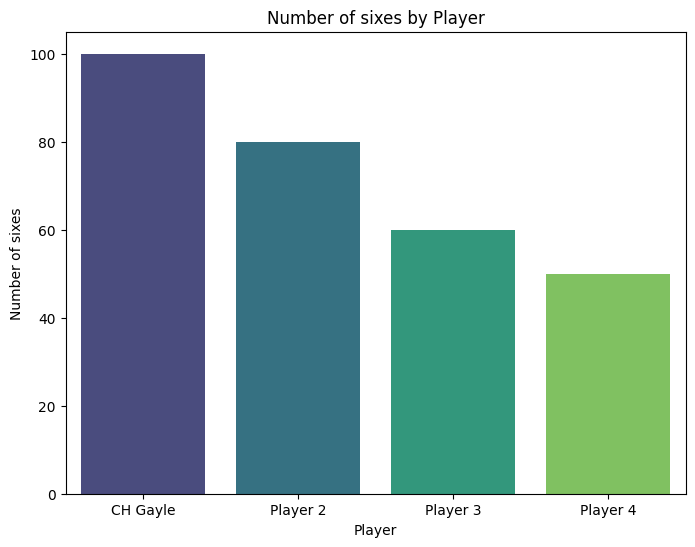

Matches per venue:
Arun Jaitley Stadium                                   74
Barabati Stadium                                        7
Brabourne Stadium                                      11
Buffalo Park                                            3
De Beers Diamond Oval                                   3
Dr. Y.S. Rajeshkhara Reddy ACA-VDCA Cricket Stadium    13
Eden Gardens                                           77
Green Park                                              4
Kingsmead                                              15
M. Chinnaswamy Stadium                                 80
Nehru Stadium                                           5
New Wanderers Stadium                                   8
Newlands                                                7
OUTsurance Oval                                         2
Sawai Mansingh Stadium                                 47
SuperSport Park                                        12
dtype: int64

Player with highest sixes: CH Gayle


In [39]:
# display how many number of sixes were secured by top 4 player.
player_sixes=pd.Series({
    'CH Gayle':100,
    'Player 2':80,
    'Player 3':60,
    'Player 4':50
})

plt.figure(figsize=(8,6))
sns.barplot(x=player_sixes.index,y=player_sixes.values,palette='viridis')
plt.xlabel('Player')
plt.ylabel('Number of sixes')
plt.title('Number of sixes by Player')
plt.show()

# display matches per venue.
print("Matches per venue:")
print(df_venue)

#display player with highest sixes.
print("\nPlayer with highest sixes:",highest_sixes_player)

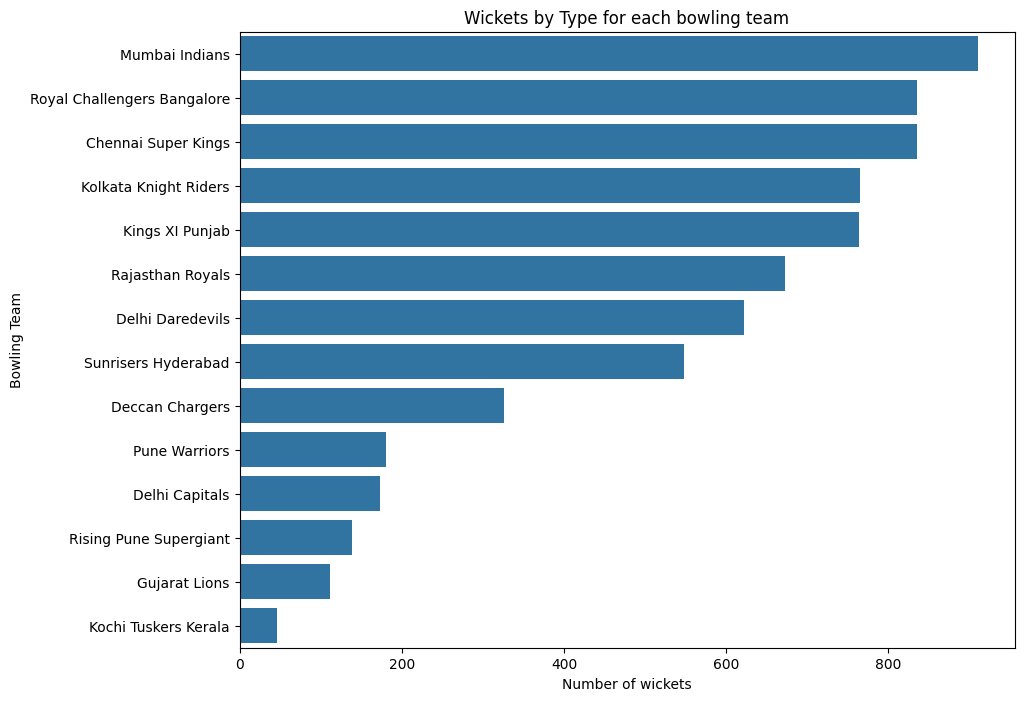

In [40]:
# display total wickets secured by bowling team.
wicket_types = ['caught','bowles','lbw','stumped','caught and bowled','hit wicket']

data=df[df['wicket_type'].apply(lambda x: x in wicket_types and x!= ' ')]['bowling_team'].value_counts()

plt.figure(figsize=(10,8))
sns.barplot(y=data.index,x=data.values,orient='h')
plt.xlabel('Number of wickets')
plt.ylabel('Bowling Team')
plt.title('Wickets by Type for each bowling team')
plt.show()

In [41]:
# describe total no balls secured by batting team.
df.groupby(['batting_team'])['noballs'].agg('sum').sort_values(ascending=False)

batting_team
Royal Challengers Bangalore    106.0
Chennai Super Kings             96.0
Mumbai Indians                  96.0
Rajasthan Royals                94.0
Kolkata Knight Riders           90.0
Delhi Daredevils                73.0
Kings XI Punjab                 71.0
Sunrisers Hyderabad             53.0
Deccan Chargers                 49.0
Pune Warriors                   24.0
Delhi Capitals                  21.0
Gujarat Lions                   17.0
Kochi Tuskers Kerala            11.0
Rising Pune Supergiant           8.0
Name: noballs, dtype: float64

In [42]:
# describe first few matches of striker.
player=(df['striker']=='V Kohli')
df2=df[player]
df2.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,run,over
132,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,1.2,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,...,0,0,0.0,0.0,0.0,0.0,,,0,1
133,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,1.3,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,...,0,4,0.0,0.0,0.0,4.0,,,4,1
134,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,1.4,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,...,1,0,0.0,0.0,0.0,0.0,,,1,1
137,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,2.1,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,...,0,0,0.0,0.0,0.0,0.0,,,0,2
138,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,2.2,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,...,0,0,0.0,0.0,0.0,0.0,bowled,V Kohli,0,2


In [43]:
# describe strikers with most runs.
top_run_scorers=df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10)
top_run_scorers

striker
V Kohli           5921
SK Raina          5430
S Dhawan          5282
DA Warner         5257
RG Sharma         5251
AB de Villiers    4916
CH Gayle          4804
MS Dhoni          4632
RV Uthappa        4609
G Gambhir         4217
Name: runs_off_bat, dtype: int64

In [44]:
# describe players with most 50s.
# describe players with most 50s.
batting_data=df.groupby(["match_id","striker"])["runs_off_bat"].sum().reset_index()

highest_fifties= batting_data[(batting_data["runs_off_bat"] >= 50) &  (batting_data["runs_off_bat"] < 100)] \
    .groupby("striker").size().sort_values(ascending=False).head(10)
highest_hundred = batting_data[batting_data["runs_off_bat"] >= 100]\
    .groupby("striker").size().sort_values(ascending=False).head(10)

print(f"Player with most 50s: {highest_fifties}")
print(f"Player with most 100s: {highest_hundred}")

Player with most 50s: striker
DA Warner         48
S Dhawan          42
V Kohli           40
AB de Villiers    39
RG Sharma         39
SK Raina          39
G Gambhir         36
CH Gayle          32
AM Rahane         28
RV Uthappa        24
dtype: int64
Player with most 100s: striker
CH Gayle          6
V Kohli           5
DA Warner         4
SR Watson         4
AB de Villiers    3
HM Amla           2
M Vijay           2
KL Rahul          2
SV Samson         2
S Dhawan          2
dtype: int64


In [45]:
# describe how many batsman are dismissal by top 10 bowlers.
dismissals=df[df['player_dismissed'].notna()]
bowler_batsman_dismissal=dismissals.groupby(['bowler','player_dismissed']).size().sort_values(ascending=False).head(10)
bowler_batsman_dismissal

bowler           player_dismissed
Harbhajan Singh                      3296
R Ashwin                             3197
PP Chawla                            3121
A Mishra                             3082
SL Malinga                           2786
DJ Bravo                             2695
SP Narine                            2687
B Kumar                              2673
RA Jadeja                            2649
P Kumar                              2535
dtype: int64

In [46]:
# describe total wickets secured by bowling team.
wicket_types = 'caught,bowles,lbw,stumped,caught and bowled,hit wicket'
wicket_types=wicket_types.split(',')

data=df[df['wicket_type'].apply(lambda x: x in wicket_types and x!= ' ')]['bowling_team'].value_counts()
data

bowling_team
Mumbai Indians                 910
Royal Challengers Bangalore    835
Chennai Super Kings            835
Kolkata Knight Riders          765
Kings XI Punjab                764
Rajasthan Royals               673
Delhi Daredevils               622
Sunrisers Hyderabad            548
Deccan Chargers                326
Pune Warriors                  180
Delhi Capitals                 173
Rising Pune Supergiant         139
Gujarat Lions                  112
Kochi Tuskers Kerala            46
Name: count, dtype: int64

In [47]:
# describe top 10 players with most sixes.
# describe top 10 players with most fours.
sixes=df[df['runs_off_bat']==6].groupby('striker').size().sort_values(ascending=False).head(10)
fours=df[df['runs_off_bat']==4].groupby('striker').size().sort_values(ascending=False).head(10)

print(f"Player with most 6s:{sixes}")
print(f"Player with most 4s:{fours}")

Player with most 6s:striker
CH Gayle          351
AB de Villiers    239
MS Dhoni          216
RG Sharma         215
V Kohli           202
SK Raina          199
KA Pollard        199
DA Warner         195
SR Watson         190
RV Uthappa        163
dtype: int64
Player with most 4s:striker
S Dhawan          601
V Kohli           510
DA Warner         510
SK Raina          496
G Gambhir         492
RG Sharma         459
RV Uthappa        454
AM Rahane         416
AB de Villiers    395
CH Gayle          387
dtype: int64


In [48]:
#check if 'extras_types' exist to filter wide balls
if 'extras_type' in df.columns:
    balls_faced=df[df['extras_type']!= 'wides'].groupby('striker').size()
else:
    balls_faced=df.groupby('striker').size() #fallback: count all delieveries

total_runs = df.groupby('striker')['runs_off_bat'].sum()

strike_rate=(total_runs/balls_faced)*100
strike_rate_filtered=strike_rate[total_runs>200].sort_values(ascending=False).head(10)
strike_rate_filtered

striker
AD Russell        171.268238
BCJ Cutting       163.013699
N Pooran          160.307692
SP Narine         155.671902
MM Ali            154.708520
CH Morris         153.055556
HH Pandya         150.164294
AB de Villiers    149.014853
V Sehwag          148.827059
GJ Maxwell        147.988506
dtype: float64

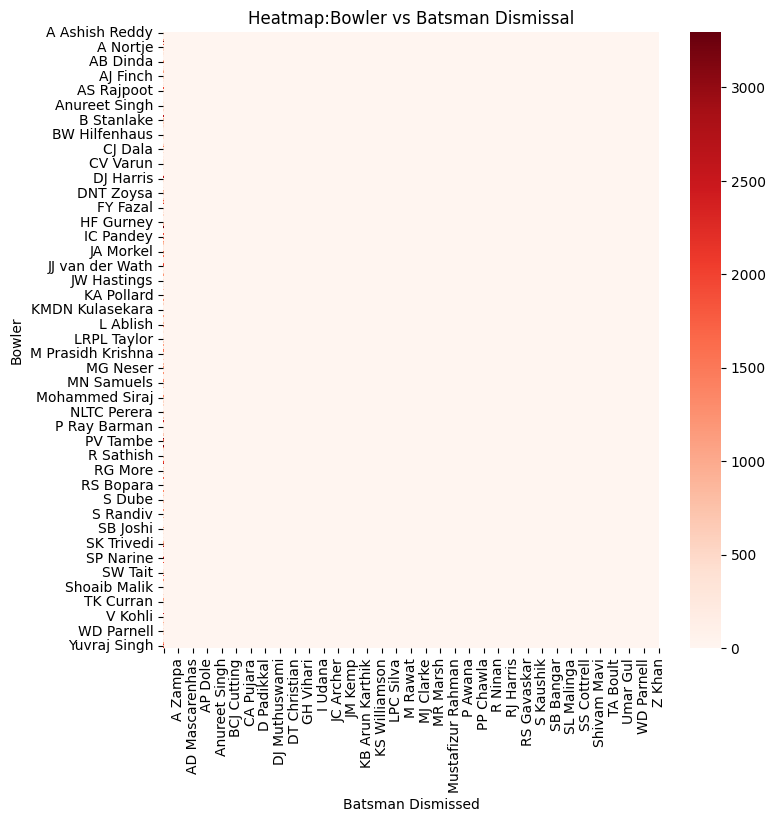

In [49]:
# display how many total batsman are dismisaal by bowlers.
wicket_df=df[df['player_dismissed'].notnull()]
heatmap_data=wicket_df.pivot_table(index='bowler',columns='player_dismissed',aggfunc='size',fill_value=0)

plt.figure(figsize=(8,8))
sns.heatmap(heatmap_data,cmap='Reds')
plt.title("Heatmap:Bowler vs Batsman Dismissal")
plt.xlabel("Batsman Dismissed")
plt.ylabel("Bowler")
plt.show()

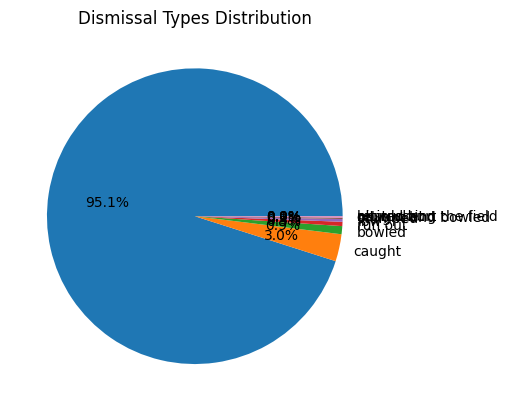

In [50]:
# display dismissal types distribution.
wicket_types=df['wicket_type'].value_counts()
plt.Figure(figsize=(100,100))
plt.pie(wicket_types,labels=wicket_types.index,autopct='%1.1f%%')
plt.title("Dismissal Types Distribution")
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_12696\1487188539.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorers.values,y=top_scorers.index,palette='viridis')


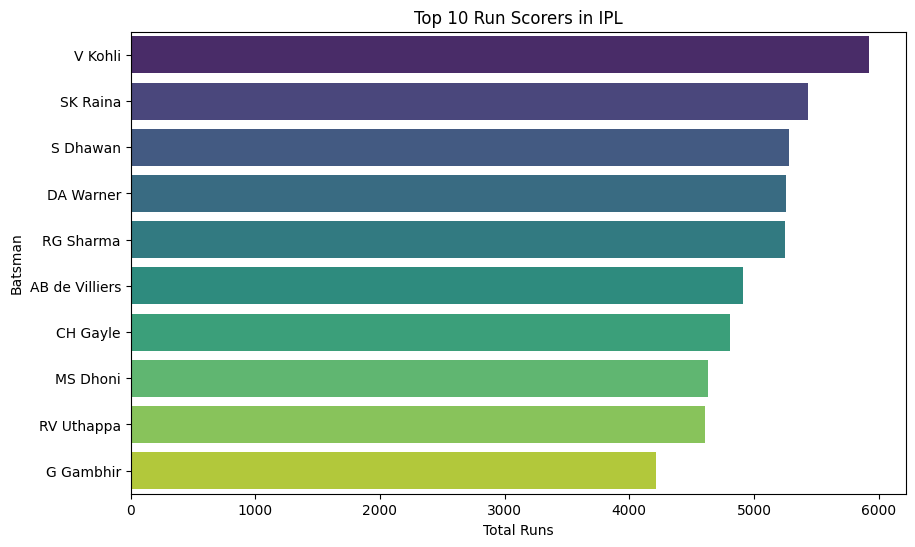

In [51]:
# display top 10 run scorers.
top_scorers=df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_scorers.values,y=top_scorers.index,palette='viridis')
plt.title("Top 10 Run Scorers in IPL")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.show()

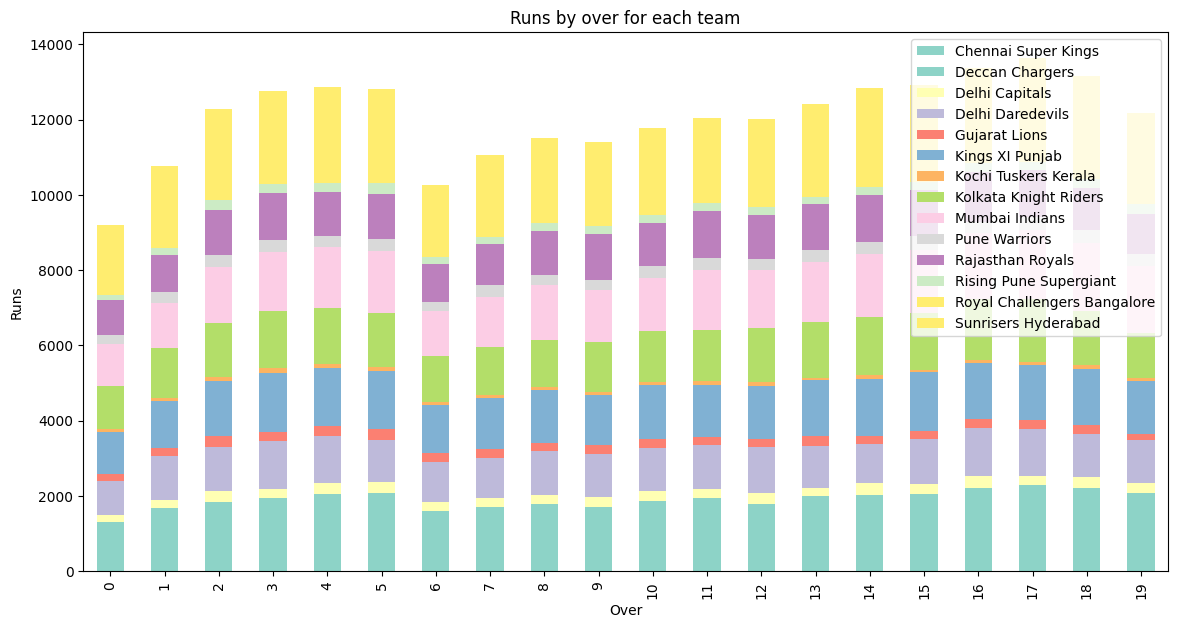

In [52]:
# display total runs by over for each team.
overview_runs=df.groupby(['batting_team','over'])['runs_off_bat'].sum().unstack().fillna(0)

overview_runs.T.plot(kind='bar',stacked=True,figsize=(14,7),colormap='Set3')
plt.title("Runs by over for each team")
plt.xlabel("Over")
plt.ylabel("Runs")
plt.legend(loc='upper right')
plt.show()

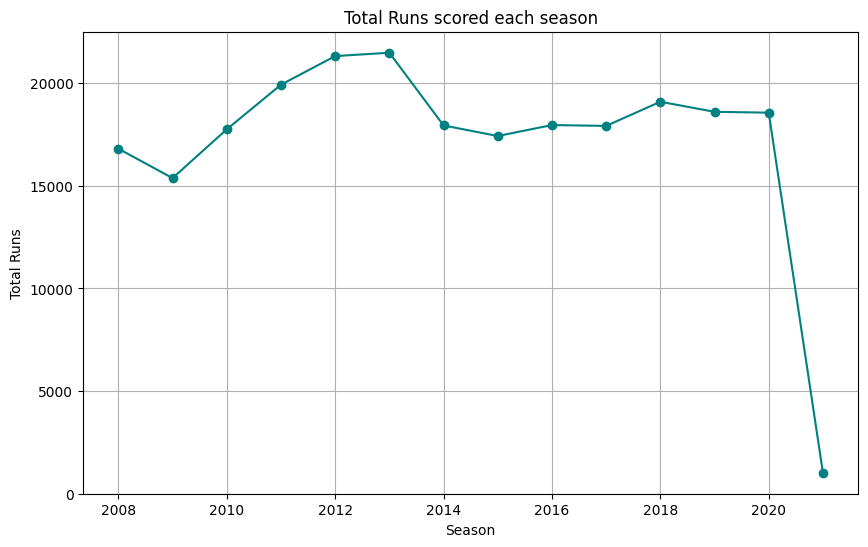

In [53]:
# display total runs scored each season.
season_runs = df.groupby('season')['runs_off_bat'].sum()

plt.figure(figsize=(10,6))
plt.plot(season_runs.index,season_runs.values,marker='o',color='teal')
plt.title("Total Runs scored each season")
plt.xlabel("Season")
plt.ylabel("Total Runs")
plt.grid(True)
plt.show()